In [ ]:
pip install texthero

In [ ]:
pip install texthero

     |████████████████████████████████| 1.5 MB 7.3 MB/s 
     |████████████████████████████████| 241 kB 46.4 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
# Importing the necessary Libraries. 

import nltk                 # The natural language toolkit
import pandas as pd         # For data manipulation and analysis
import seaborn as sns       # For data visualization
import texthero as hero     # For text preprocessing, representation and visualization
import plotly.express as px # For plots and graphs
from textblob import TextBlob # For sentiment analysis
from sklearn import naive_bayes # For using Naive Bayesl
from sklearn.linear_model import LogisticRegression # For using Logistic Regression
from sklearn.model_selection import train_test_split # For training and testing set split
from sklearn.metrics import classification_report # For classification report of algorithm
from sklearn.metrics import accuracy_score # For accuracy score of the classification

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Steps to mount the Drive 
from google.colab import drive 
drive.mount("/content/drive") 

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

 Analysis.ipynb     DataScarpingfromTwitter.ipynb
'Colab Notebooks'   NLP.ipynb
 covid_19.csv	    TweetSenti.ipynb
 covid19.csv	   'TwitterSentimental Analysis.ipynb'
 covidtweet.csv     Untitled0.ipynb


In [ ]:
#Steps tp 
!ls "/content/drive/My Drive/covidtweet.csv"

'/content/drive/My Drive/covidtweet.csv'


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("/content/drive/My Drive/covidtweet.csv",usecols=['text'])
df.head()

,text
0,Another medical professional speaking out agai...
1,Has been too long coming but I’m glad for my f...
2,Pin Code:[411014] \nKhandelwal Child Multi PMC...
3,@MichaelSpring17 @MSMWatchdog2013 @GladysB rat...
4,"COVID-19 Update: Premier @AnnastaciaMP, Deputy..."


In [ ]:
#Removing Duplicates
x = len(df) # Number of tweets before removing duplicates
df = df.drop_duplicates() # Remove duplicates
df = df[~df.text.str.startswith('RT')] # Remove retweets, since they are also duplicates
y = len(df) # Number of tweets after removing duplicates
print(x - y, 'duplicate tweets removed')
df

0 duplicate tweets removed


,text
0,Another medical professional speaking out agai...
1,Has been too long coming but I’m glad for my f...
2,Pin Code:[411014] \nKhandelwal Child Multi PMC...
3,@MichaelSpring17 @MSMWatchdog2013 @GladysB rat...
4,"COVID-19 Update: Premier @AnnastaciaMP, Deputy..."
...,...
4994,@JamesK__1 @MattySarrie BIG group of us were d...
4995,#ArunachalPradesh | DC East Kameng Revokes “...
4996,Pin Code:[411004] \nPMC P Sahyadri Super Spe D...
4998,Pin Code:[411044] \nPCMC Sterling Hospital Pra...


In [ ]:
## Removing irrelevant tweets
keywords = ['covid', 'covid19', 'covid2019', 'covid-19', 'corona', 'coronavirus', 'sars-cov', 'sars-cov2', 'virus', 'epidemic', 'pandemic', 'outbreak', 'lockdown', 'quarantine', 'socialdistancing', 'panicbuying', 'vaccine', 'vaccination', 'publichealth', 'publichealthemergency', 'who', 'worldhealthorganization', 'wuhan', 'chinawuhan', 'pathogen', 'mask', 'n95', 'selfisolation',]
irrelv_row_indexes = []

count = 0
for row in df.itertuples(): # Go through every tweet
    tweet = row.text        # Store tweet in a string
    tweet.lower()           # Convert tweet into lowercase for keyword comparison
    # Look for keywords in tweets
    if not any(x in tweet for x in keywords):
        count += 1          # If keyword not found, count number of irrelevant tweets
        irrelv_row_indexes.append(row.Index) # Append irrelevant row indexes to list
print('No. of tweets left after removing duplicates =', len(df))
print('No. of irrelevant tweets in the dataset =', count)
print('No. of relevant tweets in the dataset =', len(df) - count)
df = df.drop(pd.Series(irrelv_row_indexes)) # Remove all irrelevant tweets

No. of tweets left after removing duplicates = 4865
No. of irrelevant tweets in the dataset = 2608
No. of relevant tweets in the dataset = 2257


In [ ]:
# Create a custom pipeline
custom_pipeline = [hero.preprocessing.fillna, # Replace not assigned values with empty spaces
                   hero.preprocessing.lowercase, # Lowercase all text
                   hero.preprocessing.remove_urls, # Remove links / urls
                   hero.preprocessing.remove_digits, # Remove digits / number
                   hero.preprocessing.remove_diacritics, # Remove all accents from strings
                   hero.preprocessing.remove_punctuation, # Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)
                  ]

df['cleanText'] = hero.clean(df['text'], pipeline=custom_pipeline)

In [ ]:
df

,text
0,Another medical professional speaking out agai...
1,Has been too long coming but I’m glad for my f...
4,"COVID-19 Update Premier , Deputy Premier , Hea..."
7,In the news Hawaii sees 615 new infections and...
8,In the news California Coronavirus Updates The...
...,...
4986,The profit margin and employee/customer happin...
4987,"If nothing else, Trump's presidency and the ..."
4990,Where is mask and social distancing sir\nCOVID19
4992,Download My Kill Coronavirus On Contact Recipe...


In [ ]:
#Removing Emoticons 
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Lemmatization

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


df['cleanText'] = df.cleanText.apply(lemmatize_text).apply(lambda word: (' '.join(word)))

In [ ]:
# Removing whitespace
df['cleanText'] = hero.remove_whitespace(df['cleanText'])

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
# Removing rare words
words = set(nltk.corpus.words.words())

def remove_rarewords(tweet):
    return ' '.join(word for word in nltk.wordpunct_tokenize(tweet) if word in words)


df['cleanText'] = df['cleanText'].apply(lambda tweet: remove_rarewords(tweet))

In [ ]:
# Data after Pre-Processing Raw Data v/s Cleaned Data 
df

,text,cleanText
0,Another medical professional speaking out agai...,another medical professional speaking vaccine
1,Has been too long coming but Im glad for my fa...,long coming glad family colleague stranger ter...
4,"COVID-19 Update: Premier @AnnastaciaMP, Deputy...",covid update premier deputy premier health min...
7,In the news: Hawaii sees 615 new infections an...,news see new infection related death delta var...
8,In the news: California Coronavirus Updates: T...,news update u covid new case per day
...,...,...
4986,The profit margin and employee/customer happin...,profit margin employee customer happiness conc...
4987,"@BillKristol @JVLast If nothing else, Trump's ...",nothing else trump presidency pandemic person ...
4990,@narendramodi Where is mask and social distanc...,mask social sir
4992,#Download My Kill #Coronavirus On Contact #Rec...,kill contact recipe free


In [ ]:
# Calculating the Sentiment Score 
df['sentiment_score'] = df['cleanText'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [ ]:
# Rejoin the columns 
def assign_sentiment_label(score):
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(lambda score: assign_sentiment_label(score))

In [ ]:
df

,text,cleanText,sentiment_score,sentiment
0,Another medical professional speaking out agai...,another medical professional speaking vaccine,0.050000,Positive
1,Has been too long coming but Im glad for my fa...,long coming glad family colleague stranger ter...,-0.137500,Negative
4,"COVID-19 Update: Premier @AnnastaciaMP, Deputy...",covid update premier deputy premier health min...,0.000000,Neutral
7,In the news: Hawaii sees 615 new infections an...,news see new infection related death delta var...,0.068182,Positive
8,In the news: California Coronavirus Updates: T...,news update u covid new case per day,0.136364,Positive
...,...,...,...,...
4986,The profit margin and employee/customer happin...,profit margin employee customer happiness conc...,0.266667,Positive
4987,"@BillKristol @JVLast If nothing else, Trump's ...",nothing else trump presidency pandemic person ...,0.200000,Positive
4990,@narendramodi Where is mask and social distanc...,mask social sir,0.033333,Neutral
4992,#Download My Kill #Coronavirus On Contact #Rec...,kill contact recipe free,0.400000,Positive


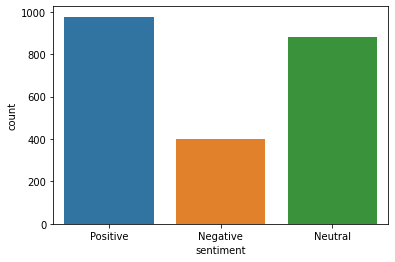

In [ ]:
#Count Plot of sentimental Analysis
sns.countplot(df['sentiment'])

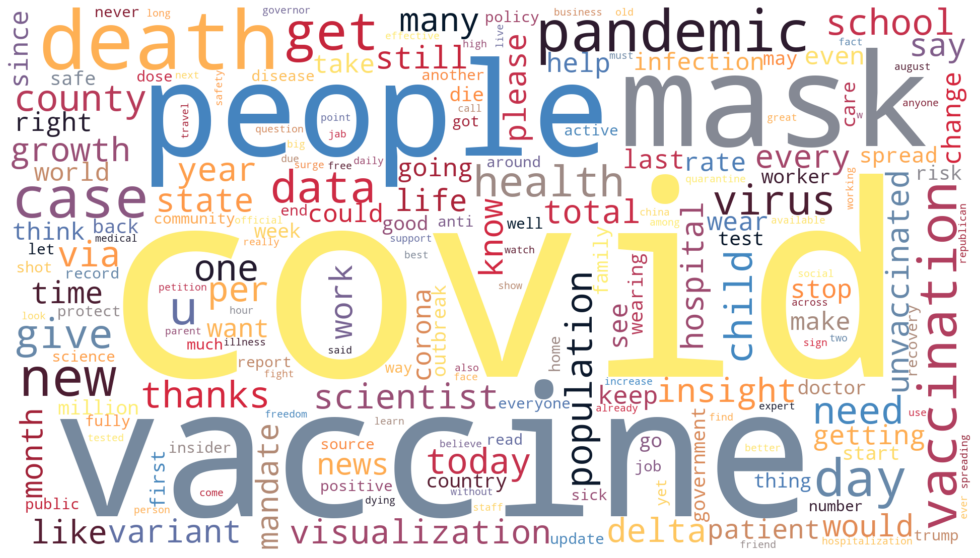

In [ ]:
### Inspecting Top Words of Cleaned Data
tw = hero.visualization.wordcloud(df['cleanText'], width=1920, height=1080, background_color='rgb(255,255,255)')

In [ ]:
#%%capture output 
#tw = hero.visualization.top_words(df['cleanText']).head(10) # Stores top words in tw

In [ ]:
#fig = px.bar(tw)
#fig.show()

In [ ]:
tfidf_df = hero.tfidf(df['cleanText'])

In [ ]:
tfidf_df

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4986    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4987    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4990    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4992    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Length: 2257, dtype: object

In [ ]:
# Training set and Test set split - 80% training set & 20% testing set
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['sentiment'], random_state=0, test_size=0.2)

In [ ]:
#Importing Naive Bayes MultinomialNB Model
# Setting up the model class
classifer = naive_bayes.MultinomialNB()

# Training the model
classifer.fit(list(X_train), y_train)

# Prediciting the results
predicted = classifer.predict(list(X_test))

# Print a classification report
print(classification_report(y_test, predicted))

# Calculate classification accuracy
accuracy = accuracy_score(predicted, y_test)

# Print accuracy
print(round(accuracy * 100, 2), '%')

              precision    recall  f1-score   support

    Negative       1.00      0.03      0.05        75
     Neutral       0.60      0.60      0.60       169
    Positive       0.64      0.87      0.74       208

    accuracy                           0.63       452
   macro avg       0.75      0.50      0.46       452
weighted avg       0.68      0.63      0.57       452

62.61 %


In [ ]:
# Implementing Logistic Regression
# Setting up the model class
classifier = LogisticRegression()

# Training the model
classifier.fit(list(X_train), y_train)

# Prediciting the results
predicted = classifier.predict(list(X_test))

# Print a classification report
print(classification_report(y_test, predicted))

# Calculate classification accuracy
accuracy = accuracy_score(predicted, y_test)

# Print accuracy
print(round(accuracy * 100, 2), '%')

              precision    recall  f1-score   support

    Negative       0.93      0.17      0.29        75
     Neutral       0.62      0.78      0.69       169
    Positive       0.76      0.83      0.79       208

    accuracy                           0.70       452
   macro avg       0.77      0.59      0.59       452
weighted avg       0.74      0.70      0.67       452

69.91 %
